# Домашнеее задание: Июльский курс (2020). Pro. Занятие 2
# Полносвязные сети, обучающая и тестовая выборки
## Верхошинская Катерина Викторовна



## **LIGHT**


**Задание:** Создайте модель для распознавания рукописных цифр из набора MNIST (можно воспользоваться ноутбуком 1-го занятия) и проведите ряд тестов: 


1.  Запустите сеть с различными размерами обучающей и проверочной выборок:  
 *    a. Обучающая выборка 50.000 примеров 
 *   b. Обучающая выборка 10.000 примеров
 *   c. Обучающая выборка 500 примеров

2.   Создайте еще два варианта сети и сравните значения точности на проверочной выборке (на  последней эпохе) и на тестовой выборке. Сделайте сравнительную таблицу.

3. Создайте сеть следующей архитектуры: 

 * a. 4 Dense слоя
 * b. 3 Dropout слоя 
 * c. 3 BatchNormalization слоя

 Напишите свои выводы по результатам проведенных тестов. 


**Решение:**

In [ ]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab 
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() 

In [ ]:
x_train_org[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

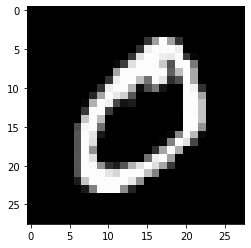

In [ ]:
n = 1
plt.imshow(x_train_org[n], cmap='gray') 
plt.show() 

In [ ]:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
# Нормализуем входные картинки
x_train = x_train.astype('float32') 
x_train = x_train / 255 
x_test = x_test.astype('float32') 
x_test = x_test / 255 

In [ ]:
y_train_org[0]

5

In [ ]:
utils.to_categorical(y_train_org[0], 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_train[n]) 
print(y_train_org.shape)
print(y_train_org[36])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(60000,)
6


In [ ]:
model_mnist = Sequential()
model_mnist.add(Dense(800, input_dim=784, activation="relu"))
model_mnist.add(Dense(400, activation="relu"))
model_mnist.add(Dense(10, activation="softmax"))
model_mnist.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
print(model_mnist.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_19 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


### **1)** **Запустите сеть с различными размерами обучающей и проверочной выборок**

#### a) Обучающая выборка 50.000 примеров

In [ ]:
#50000 примеров отводим обучающей выборке
n_val = 50000
history_1 = model_mnist.fit(x_train[:n_val], 
                    y_train[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train[n_val:]), 
                    verbose=1)

Epoch 1/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0107 - accuracy: 0.9291 - val_loss: 0.0074 - val_accuracy: 0.9525
Epoch 2/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0055 - accuracy: 0.9649 - val_loss: 0.0067 - val_accuracy: 0.9580
Epoch 3/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0044 - accuracy: 0.9724 - val_loss: 0.0049 - val_accuracy: 0.9699
Epoch 4/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0039 - accuracy: 0.9757 - val_loss: 0.0046 - val_accuracy: 0.9724
Epoch 5/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0036 - accuracy: 0.9782 - val_loss: 0.0043 - val_accuracy: 0.9743
Epoch 6/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0035 - accuracy: 0.9794 - val_loss: 0.0057 - val_accuracy: 0.9671
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0033 - accuracy: 0.9811 - val_loss: 0.0047 - val_accuracy:

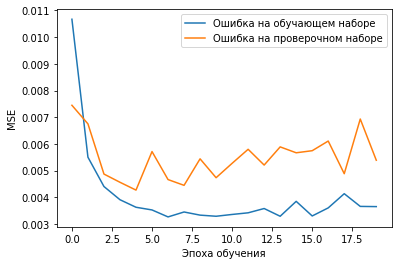

In [ ]:
#Отобразим результаты
plt.plot(history_1.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_1.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

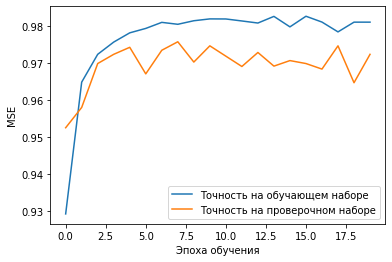

In [ ]:
plt.plot(history_1.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history_1.history['val_accuracy'], label='Точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

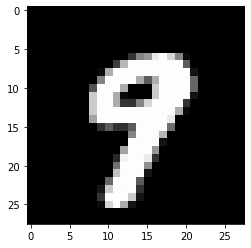

In [ ]:
n_rec = 7799
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [ ]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
prediction = model_mnist.predict(x)
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
prediction = np.argmax(prediction)
print("То что распознала сеть:", prediction)
print("Правильный ответ:" , y_test_org[n_rec])

То что распознала сеть: 9
Правильный ответ: 9


#### b) Обучающая выборка 10.000 примеров

In [ ]:
#10000 примеров отводим обучающей выборке
n_val = 10000
history_2 = model_mnist.fit(x_train[:n_val], 
                    y_train[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train[n_val:]), 
                    verbose=1)

Epoch 1/20
500/500 [==============================] - 5s 10ms/step - loss: 0.0031 - accuracy: 0.9837 - val_loss: 0.0046 - val_accuracy: 0.9765
Epoch 2/20
500/500 [==============================] - 5s 9ms/step - loss: 0.0035 - accuracy: 0.9822 - val_loss: 0.0038 - val_accuracy: 0.9805
Epoch 3/20
500/500 [==============================] - 4s 8ms/step - loss: 0.0034 - accuracy: 0.9824 - val_loss: 0.0038 - val_accuracy: 0.9807
Epoch 4/20
500/500 [==============================] - 4s 8ms/step - loss: 0.0028 - accuracy: 0.9859 - val_loss: 0.0044 - val_accuracy: 0.9773
Epoch 5/20
500/500 [==============================] - 4s 8ms/step - loss: 0.0044 - accuracy: 0.9769 - val_loss: 0.0054 - val_accuracy: 0.9725
Epoch 6/20
500/500 [==============================] - 4s 8ms/step - loss: 0.0047 - accuracy: 0.9755 - val_loss: 0.0045 - val_accuracy: 0.9770
Epoch 7/20
500/500 [==============================] - 4s 8ms/step - loss: 0.0029 - accuracy: 0.9849 - val_loss: 0.0045 - val_accuracy: 0.9766
Epoch

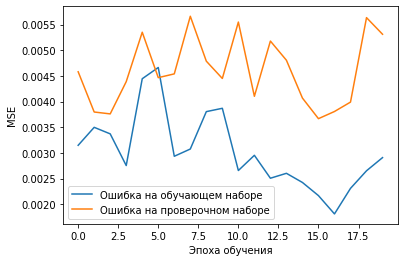

In [ ]:
#Отобразим результаты
plt.plot(history_2.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_2.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

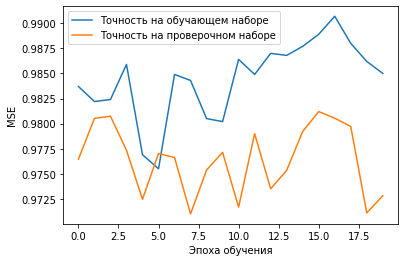

In [ ]:
plt.plot(history_2.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history_2.history['val_accuracy'], label='Точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

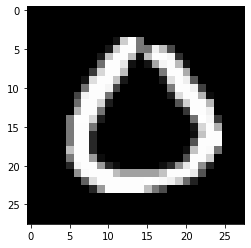

In [ ]:
n_rec = 7723
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [ ]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
prediction = model_mnist.predict(x)
print(prediction)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
prediction = np.argmax(prediction)
print("То что распознала сеть:", prediction)
print("Правильный ответ:" , y_test_org[n_rec])

То что распознала сеть: 0
Правильный ответ: 0


#### c) Обучающая выборка 500 примеров

In [ ]:
#500 примеров отводим обучающей выборке
n_val = 500
history_3 = model_mnist.fit(x_train[:n_val], 
                    y_train[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train[n_val:]), 
                    verbose=1)

Epoch 1/20
25/25 [==============================] - 4s 155ms/step - loss: 0.0035 - accuracy: 0.9820 - val_loss: 0.0050 - val_accuracy: 0.9744
Epoch 2/20
25/25 [==============================] - 4s 158ms/step - loss: 0.0028 - accuracy: 0.9860 - val_loss: 0.0050 - val_accuracy: 0.9743
Epoch 3/20
25/25 [==============================] - 4s 154ms/step - loss: 0.0028 - accuracy: 0.9860 - val_loss: 0.0050 - val_accuracy: 0.9743
Epoch 4/20
25/25 [==============================] - 4s 154ms/step - loss: 0.0028 - accuracy: 0.9860 - val_loss: 0.0050 - val_accuracy: 0.9743
Epoch 5/20
25/25 [==============================] - 4s 155ms/step - loss: 0.0028 - accuracy: 0.9860 - val_loss: 0.0050 - val_accuracy: 0.9743
Epoch 6/20
25/25 [==============================] - 4s 152ms/step - loss: 0.0028 - accuracy: 0.9860 - val_loss: 0.0050 - val_accuracy: 0.9743
Epoch 7/20
25/25 [==============================] - 4s 154ms/step - loss: 0.0028 - accuracy: 0.9860 - val_loss: 0.0050 - val_accuracy: 0.9743
Epoch 

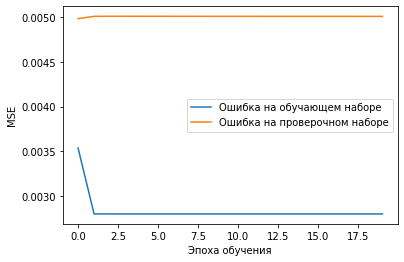

In [ ]:
#Отобразим результаты
plt.plot(history_3.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_3.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

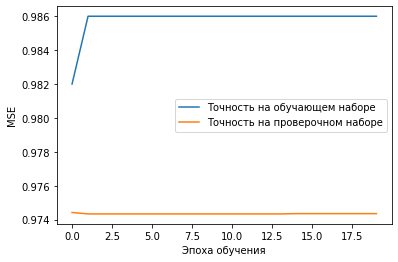

In [ ]:
plt.plot(history_3.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history_3.history['val_accuracy'], label='Точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

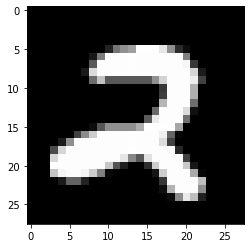

In [ ]:
n_rec = 7789
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

In [ ]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)
prediction = model_mnist.predict(x)
print(prediction)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
prediction = np.argmax(prediction)
print("То что распознала сеть:", prediction)
print("Правильный ответ:" , y_test_org[n_rec])

То что распознала сеть: 2
Правильный ответ: 2


#### Итог

Все три варианта наборов обучающих выборок в результате дали правильный ответ, но при наборе в 500 примеров, есть большое подазрение на переобучение, сеть явно стала просто заучивать данные. Судя по графикам, 1й вариант с 50 000 примеров отработал корректнее всех.
Отсюда делаем вывод, что чем больше хороших данных - тем лучше, впринципе что и требовалось доказать))

### **2) Создайте еще два варианта сети и сравните значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке. Сделайте сравнительную таблицу.**

#### Вариант сети 1

In [ ]:
model_1 = Sequential()
model_1.add(Dense(800, input_dim=784, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(400, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation="softmax"))
model_1.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
print(model_1.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_8 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#50000 примеров отводим обучающей выборке
n_val = 50000
history_model_1 = model_1.fit(x_train[:n_val], 
                    y_train[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train[n_val:]), 
                    verbose=1)

Epoch 1/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0120 - accuracy: 0.9194 - val_loss: 0.0077 - val_accuracy: 0.9496
Epoch 2/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0072 - accuracy: 0.9550 - val_loss: 0.0057 - val_accuracy: 0.9636
Epoch 3/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0062 - accuracy: 0.9614 - val_loss: 0.0058 - val_accuracy: 0.9639
Epoch 4/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0056 - accuracy: 0.9664 - val_loss: 0.0048 - val_accuracy: 0.9716
Epoch 5/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0056 - accuracy: 0.9675 - val_loss: 0.0067 - val_accuracy: 0.9622
Epoch 6/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0057 - accuracy: 0.9680 - val_loss: 0.0053 - val_accuracy: 0.9701
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0054 - accuracy: 0.9701 - val_loss: 0.0053 - val_accuracy:

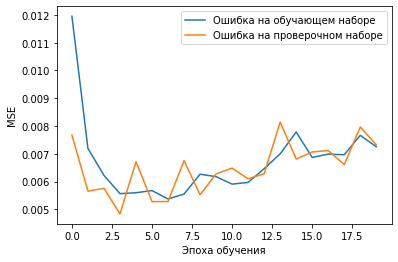

In [ ]:
#Отобразим результаты
plt.plot(history_model_1.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_model_1.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

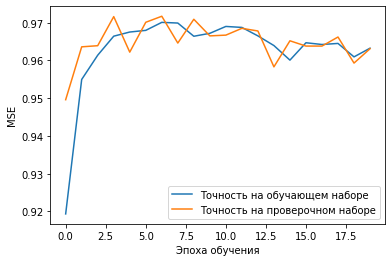

In [ ]:
plt.plot(history_model_1.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history_model_1.history['val_accuracy'], label='Точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
#Процентное значения точности на проверочной выборке по эпохам
val_acc = history_model_1.history['val_accuracy']
for i in range(len(val_acc)):
  print("Эпоха: ", i, " точность: ", round(100*val_acc[i], 2), "%", sep="")

Эпоха: 0 точность: 94.96%
Эпоха: 1 точность: 96.36%
Эпоха: 2 точность: 96.39%
Эпоха: 3 точность: 97.16%
Эпоха: 4 точность: 96.22%
Эпоха: 5 точность: 97.01%
Эпоха: 6 точность: 97.17%
Эпоха: 7 точность: 96.46%
Эпоха: 8 точность: 97.09%
Эпоха: 9 точность: 96.65%
Эпоха: 10 точность: 96.67%
Эпоха: 11 точность: 96.85%
Эпоха: 12 точность: 96.78%
Эпоха: 13 точность: 95.83%
Эпоха: 14 точность: 96.52%
Эпоха: 15 точность: 96.38%
Эпоха: 16 точность: 96.38%
Эпоха: 17 точность: 96.62%
Эпоха: 18 точность: 95.93%
Эпоха: 19 точность: 96.31%


In [ ]:
# числовое значение точности на проверочном наборе на последней эпохе:
last_val1_accuracy = history_model_1.history['val_accuracy'][-1]
print(last_val1_accuracy)

0.963100016117096


In [ ]:
#Вычисляем результаты сети на тестовом наборе
scores_1 = model_1.evaluate(x_test, y_test, verbose=1)
print(scores_1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_1[1] * 100, 2), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9593
[0.00801608245819807, 0.9592999815940857]
Доля верных ответов на тестовых данных, в процентах: 95.93%


#### Вариант сети 2

In [ ]:
model_2 = Sequential()
model_2.add(BatchNormalization(input_shape=(784, )))
model_2.add(Dense(800, input_dim=784, activation="relu"))
model_2.add(BatchNormalization())
model_2.add(Dense(400, activation="relu"))
model_2.add(BatchNormalization())
model_2.add(Dense(10, activation="softmax"))
model_2.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
print(model_2.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_32 (Dense)             (None, 800)               628000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 800)               3200      
_________________________________________________________________
dense_33 (Dense)             (None, 400)               320400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 400)               1600      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                4010      
Total params: 960,346
Trainable params: 956,378
Non-trainable params: 3,968
___________________________________________

In [ ]:
#50000 примеров отводим обучающей выборке
n_val = 50000
history_model_2 = model_2.fit(x_train[:n_val], 
                    y_train[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train[n_val:]), 
                    verbose=1)

Epoch 1/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0147 - accuracy: 0.9040 - val_loss: 0.0082 - val_accuracy: 0.9474
Epoch 2/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0085 - accuracy: 0.9451 - val_loss: 0.0059 - val_accuracy: 0.9625
Epoch 3/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0069 - accuracy: 0.9561 - val_loss: 0.0064 - val_accuracy: 0.9600
Epoch 4/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0057 - accuracy: 0.9633 - val_loss: 0.0049 - val_accuracy: 0.9699
Epoch 5/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0050 - accuracy: 0.9684 - val_loss: 0.0047 - val_accuracy: 0.9715
Epoch 6/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0047 - accuracy: 0.9706 - val_loss: 0.0047 - val_accuracy: 0.9713
Epoch 7/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0042 - accuracy: 0.9735 - val_loss: 0.0046 - val_accuracy:

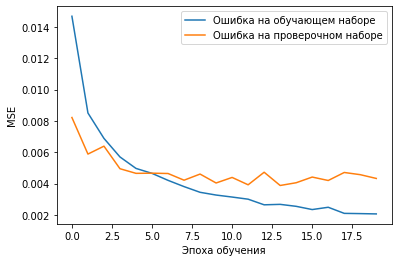

In [ ]:
#Отобразим результаты
plt.plot(history_model_2.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_model_2.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

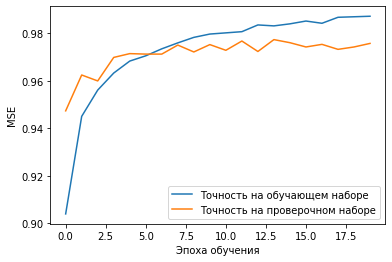

In [ ]:
plt.plot(history_model_2.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history_model_2.history['val_accuracy'], label='Точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
#Процентное значения точности на проверочной выборке по эпохам
val_acc = history_model_2.history['val_accuracy']
for i in range(len(val_acc)):
  print("Эпоха: ", i, " точность: ", round(100*val_acc[i], 2), "%", sep="")

Эпоха: 0 точность: 94.74%
Эпоха: 1 точность: 96.25%
Эпоха: 2 точность: 96.0%
Эпоха: 3 точность: 96.99%
Эпоха: 4 точность: 97.15%
Эпоха: 5 точность: 97.13%
Эпоха: 6 точность: 97.13%
Эпоха: 7 точность: 97.51%
Эпоха: 8 точность: 97.22%
Эпоха: 9 точность: 97.53%
Эпоха: 10 точность: 97.29%
Эпоха: 11 точность: 97.68%
Эпоха: 12 точность: 97.24%
Эпоха: 13 точность: 97.74%
Эпоха: 14 точность: 97.61%
Эпоха: 15 точность: 97.43%
Эпоха: 16 точность: 97.54%
Эпоха: 17 точность: 97.33%
Эпоха: 18 точность: 97.43%
Эпоха: 19 точность: 97.58%


In [ ]:
# числовое значение точности на проверочном наборе на последней эпохе:
last_val2_accuracy = history_model_2.history['val_accuracy'][-1]
print(last_val2_accuracy)

0.9757999777793884


In [ ]:
#Вычисляем результаты сети на тестовом наборе
scores_2 = model_2.evaluate(x_test, y_test, verbose=1)
print(scores_2)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_2[1] * 100, 2), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9776
[0.003926888573914766, 0.9775999784469604]
Доля верных ответов на тестовых данных, в процентах: 97.76%


#### Сравнительная таблица

In [ ]:
print("Данные сети 1:")
print(model_1.summary())
print("***************")
print("Данные сети 2:")
print(model_2.summary())
print("***************")
print('''                                                                 | вариант первой сети | вариант второй сети''')
print('Доля верных ответов на тестовых данных, в процентах              |', round(scores_1[1] * 100, 2),
      '              |', round(scores_2[1] * 100, 2))
print('Значение точности на проверочном наборе на последней эпохе       |', round(last_val1_accuracy * 100, 2),
      '              |', round(last_val2_accuracy * 100, 2))

Данные сети 1:
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_8 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
***************
Данные сети 2:
Model: "sequential_12"
_______________________________________

**Итог :**    Как видно из сводной таблицы, вторая сеть, схожая по архитектуре с первой, только с BatchNormalization без Dropout, превосходит в точности первую(с Dropout без BatchNormalization), хоть совсем и ненамного.

### **3) Создайте сеть следующей архитектуры:**

*  **4 Dense слоя**
*  **3 Dropout слоя**
*  **3 BatchNormalization слоя**


In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(784, )))
model.add(Dense(800, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(400, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(400, activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 784)               3136      
_________________________________________________________________
dense_45 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_12 (Dropout)         (None, 800)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 800)               3200      
_________________________________________________________________
dense_46 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_13 (Dropout)         (None, 400)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 400)             

In [ ]:
#50000 примеров отводим обучающей выборке
n_val = 50000
history_model = model.fit(x_train[:n_val], 
                    y_train[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_train[n_val:], y_train[n_val:]), 
                    verbose=1)

Epoch 1/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0186 - accuracy: 0.8766 - val_loss: 0.0073 - val_accuracy: 0.9544
Epoch 2/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0119 - accuracy: 0.9224 - val_loss: 0.0067 - val_accuracy: 0.9578
Epoch 3/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0097 - accuracy: 0.9369 - val_loss: 0.0057 - val_accuracy: 0.9642
Epoch 4/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0088 - accuracy: 0.9443 - val_loss: 0.0046 - val_accuracy: 0.9711
Epoch 5/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0080 - accuracy: 0.9489 - val_loss: 0.0050 - val_accuracy: 0.9695
Epoch 6/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0072 - accuracy: 0.9537 - val_loss: 0.0041 - val_accuracy: 0.9753
Epoch 7/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.0067 - accuracy: 0.9570 - val_loss: 0.0043 - val_accuracy:

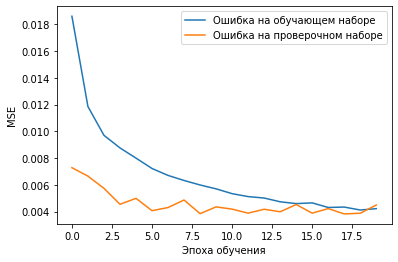

In [ ]:
#Отобразим результаты
plt.plot(history_model.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history_model.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

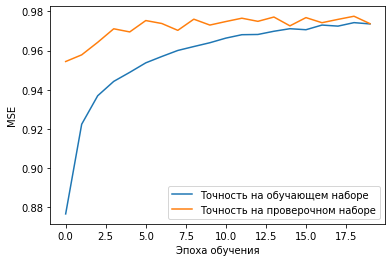

In [ ]:
plt.plot(history_model.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history_model.history['val_accuracy'], label='Точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
#Процентное значения точности на проверочной выборке по эпохам
val_acc = history_model.history['val_accuracy']
for i in range(len(val_acc)):
  print("Эпоха: ", i, " точность: ", round(100*val_acc[i], 2), "%", sep="")

Эпоха: 0 точность: 95.44%
Эпоха: 1 точность: 95.78%
Эпоха: 2 точность: 96.42%
Эпоха: 3 точность: 97.11%
Эпоха: 4 точность: 96.95%
Эпоха: 5 точность: 97.53%
Эпоха: 6 точность: 97.38%
Эпоха: 7 точность: 97.03%
Эпоха: 8 точность: 97.6%
Эпоха: 9 точность: 97.3%
Эпоха: 10 точность: 97.48%
Эпоха: 11 точность: 97.65%
Эпоха: 12 точность: 97.49%
Эпоха: 13 точность: 97.71%
Эпоха: 14 точность: 97.26%
Эпоха: 15 точность: 97.68%
Эпоха: 16 точность: 97.42%
Эпоха: 17 точность: 97.59%
Эпоха: 18 точность: 97.75%
Эпоха: 19 точность: 97.37%


In [ ]:
# числовое значение точности на проверочном наборе на последней эпохе:
last_val_accuracy = history_model.history['val_accuracy'][-1]
print(last_val_accuracy)

0.9736999869346619


In [ ]:
#Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 2), "%", sep="")

313/313 [==============================] - 1s 2ms/step - loss: 0.0048 - accuracy: 0.9713
[0.004843572620302439, 0.9713000059127808]
Доля верных ответов на тестовых данных, в процентах: 97.13%


In [ ]:
print('Доля верных ответов на тестовых данных, в процентах: ', round(scores[1] * 100, 2))
print('Значение точности на проверочном наборе на последней эпохе:', round(last_val_accuracy * 100, 2))

Доля верных ответов на тестовых данных, в процентах:  97.13
Значение точности на проверочном наборе на последней эпохе: 97.37


### **Итог**

In [ ]:
print("Данные сети 1:")
print(model_1.summary())
print("***************")
print("Данные сети 2:")
print(model_2.summary())
print("***************")
print("Данные последней сети:")
print(model.summary())
print("***************")
print('''                                                                 | вариант первой сети | вариант второй сети | вариант последней сети''')
print('Доля верных ответов на тестовых данных, в процентах              |', round(scores_1[1] * 100, 2),
      '              |', round(scores_2[1] * 100, 2), 
      '              |', round(scores[1] * 100, 2))
print('Значение точности на проверочном наборе на последней эпохе       |', round(last_val1_accuracy * 100, 2),
      '              |', round(last_val2_accuracy * 100, 2),
      '              |', round(last_val_accuracy * 100, 2))

Данные сети 1:
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_8 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
***************
Данные сети 2:
Model: "sequential_12"
_______________________________________

Как видно из таблицы выше, максимальную точность показала сеть с BatchNormalization без Dropout, хоть она имеет схожую архитектуру с первой и последней  -  результать всеже немного лучше.
Можно сказать что для данной задачи архитектура второй сети самая оптимальная из протестированных. Ну и конечно же важен размер данных подаваемых сети на обучение - чем больше качественных данных и более сбалансированная под эти данные архитектура - тем лучше. 
При маленьком наборе данных, и сильной архитектуре происходит переобучение чаще чем на большом наборе. Поэтому необходимо всегда соблюдать баланс бвзы и артитектуры, чтобы не произожзо "заучивание" данных, и при маленькой базе использовать архитектуру попроще.

## **PRO**

### **Вариант 2**

**Задание:** По подготовленным на занятии данным создайте обучающую, тестовую и проверочную выборки. По сформированным данным необходимо обучить модель для предсказания цены машины. Оцените качество работы созданной сети, определив средний процент ошибки на проверочной выборке. (Для этого потребуется привести предсказанные моделью значения к первоначальному диапазону цен. Это можно сделать с помощью следующего метода: 
predict_inverse = y_scaler.inverse_transfrom(predict).flatten() где predict - результат предсказания модели). Затем подсчитайте ошибку на каждом примере тестовой выборки и суммарный процент ошибки. Рекомендации: 
* В качестве ошибки рекомендуется использовать среднеквадратическую ошибку (mse). 
* Метрику для данной задачи можно не использовать. 
* Последний слой модели должен иметь 1 нейрон. 


**Решение:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from google.colab import files
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adadelta, Adam

In [ ]:
#Загружаем файлы
files.upload()
!ls #Выводим содержимое корневой папки

Saving cars_new.csv to cars_new.csv
cars_new.csv  sample_data


In [ ]:
# Считываем csv с помощью pandas
cars = pd.read_csv('cars_new.csv', sep=',')
cars[:5] # Выводим первые 5 машин 

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [ ]:
print(cars.values.shape)

(70119, 10)


In [ ]:
# Создаём словарь поле - его индекс
def create_dict(s):
  ret = {}                          # Создаём пустой словарь
  for _id, name in enumerate(s):    # Проходим по всем парам - id и название
    ret.update({name: _id})         # Добавляем в словарь
  return ret

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

In [ ]:
# Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры
# и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [ ]:
print(marks_dict)

{'daewoo': 0, 'mazda': 1, 'volkswagen': 2, 'skoda': 3, 'peugeot': 4, 'kia': 5, 'renault': 6, 'ford': 7, 'suzuki': 8, 'chery': 9, 'chevrolet': 10, 'toyota': 11, 'mercedes-benz': 12, 'nissan': 13, 'subaru': 14, 'hyundai': 15, 'bmw': 16, 'opel': 17, 'audi': 18, 'honda': 19, 'mitsubishi': 20}


In [ ]:
years.mean()

7.129646144783743e-15

In [ ]:
years.std()

1.0

In [ ]:
print(powers)

[ 0.22905575 -0.95630346 -0.87163494 ...  0.22905575 -0.75309902
  2.34576862]


In [ ]:
# Создаём пустую выборку
x_train = []
y_train = []

# Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  # В y_train добавляем цену
  y_train.append(prices[_id])
  
  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  
  # Добавляем текущую строку в общий x_train
  x_train.append(x_tr)

# Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

In [ ]:
# Выводим один x_train
print(x_train[0,:20])
print(x_train[0,-20:])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          1.          0.
  1.          0.          0.          0.          1.5200145  -1.40018212
  0.12288486  0.22905575]


In [ ]:
# Выводим y_train
print(y_train[:10])

[ 996000.  140200.  750000.  970000.  205000.  985000.  589000.  500000.
 1320000.  270000.]


In [ ]:
from sklearn.model_selection import train_test_split

x_my_train, x_test, y_my_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, shuffle = True)

print(x_my_train.shape)
print(y_my_train.shape) 

print(y_test.shape) 
print(x_test.shape)

# Нормализуем y_my_train и y_test
y_train_scaler = StandardScaler()
y_my_train_scaled = y_train_scaler.fit_transform(y_my_train.reshape(-1,1)).flatten() # from 0 to 1
y_test_scaler = StandardScaler()
y_test_scaled = y_test_scaler.fit_transform(y_test.reshape(-1,1)).flatten() # from 0 to 1


(56095, 3208)
(56095,)
(14024,)
(14024, 3208)


In [ ]:
#Создаём сеть
model_ula = Sequential()
model_ula.add(Dense(2500, activation='relu', input_shape=(x_my_train.shape[1],)))
model_ula.add(Dense(2500, activation='relu'))
model_ula.add(Dense(1, activation='linear'))
model_ula.compile(optimizer=Adam(lr=0.0001), loss='mse')

#45000 примеров отводим обучающей выборке
n_val = 45000
history = model_ula.fit(x_my_train[:n_val], 
                    y_my_train_scaled[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_my_train[n_val:], y_my_train_scaled[n_val:]), 
                    verbose=1)


Epoch 1/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.1713 - val_loss: 0.1749
Epoch 2/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.1117 - val_loss: 0.1439
Epoch 3/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0941 - val_loss: 0.1273
Epoch 4/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0839 - val_loss: 0.1270
Epoch 5/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0792 - val_loss: 0.1135
Epoch 6/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0695 - val_loss: 0.1121
Epoch 7/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0596 - val_loss: 0.1118
Epoch 8/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0676 - val_loss: 0.1369
Epoch 9/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0548 - val_loss: 0.0937
Epoch 10/20
2250/2250 [==============================] - 10s 4ms/step - l

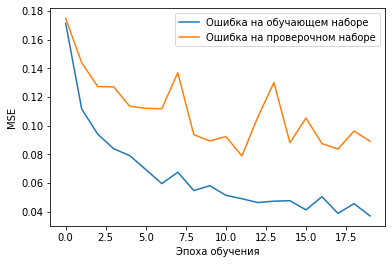

Средняя ошибка:  69190.0
Средняя цена:  533413.0
Процент ошибки: 13.0%


In [ ]:
import numpy as np

#Отобразим результаты
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model_ula.predict(x_my_train[n_val:])
predict = y_train_scaler.inverse_transform(predict).flatten()

#Считаем среднюю цену, среднюю ошибку и средний процент ошибки
delta = predict - y_my_train[n_val:]
abs_delta = abs(delta)
mean_delta = np.sum(abs_delta)/len(abs_delta)
mean_price = np.sum(y_my_train[n_val:])/len(y_my_train[n_val:])
print("Средняя ошибка: ", round(mean_delta))
print("Средняя цена: ", round(mean_price))
print("Процент ошибки: ", round(100*mean_delta / mean_price), "%", sep="")

In [ ]:
# Пробуем дооучить сеть для уменьшения процента ошибки,
# умешьшив шаг оптимизатора
model_ula.compile(optimizer=Adam(lr=0.00001), loss='mse')

history = model_ula.fit(x_my_train[:n_val], 
                    y_my_train_scaled[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_my_train[n_val:], y_my_train_scaled[n_val:]), 
                    verbose=1)


Epoch 1/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0291 - val_loss: 0.0847
Epoch 2/20
2250/2250 [==============================] - 10s 5ms/step - loss: 0.0269 - val_loss: 0.0825
Epoch 3/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0258 - val_loss: 0.0816
Epoch 4/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0252 - val_loss: 0.0867
Epoch 5/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0242 - val_loss: 0.0874
Epoch 6/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0246 - val_loss: 0.0848
Epoch 7/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0243 - val_loss: 0.0823
Epoch 8/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0238 - val_loss: 0.0829
Epoch 9/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0245 - val_loss: 0.0834
Epoch 10/20
2250/2250 [==============================] - 10s 4ms/step - l

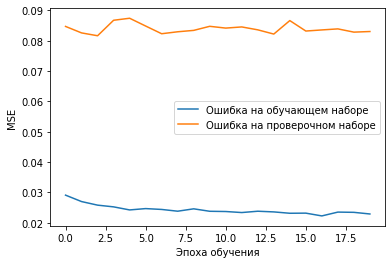

Суммарный процент ошибки на проверочной выборке: 13.0%


In [ ]:
#Отобразим результаты
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model_ula.predict(x_my_train[n_val:])
predict = y_train_scaler.inverse_transform(predict).flatten()

# суммарный процент ошибки на проверочной выборке
delta = predict - y_my_train[n_val:]
abs_delta = abs(delta)
mean_delta = np.sum(abs_delta)/len(abs_delta)
mean_price = np.sum(y_my_train[n_val:])/len(y_my_train[n_val:])
print("Суммарный процент ошибки на проверочной выборке: ", round(100*mean_delta / mean_price), "%", sep="")

In [ ]:
# Пробуем дооучить сеть для уменьшения процента ошибки,
# умешьшив шаг оптимизатора
model_ula.compile(optimizer=Adam(lr=0.000001), loss='mse')

history = model_ula.fit(x_my_train[:n_val], 
                    y_my_train_scaled[:n_val],
                    batch_size=20,
                    epochs=20, 
                    validation_data=(x_my_train[n_val:], y_my_train_scaled[n_val:]), 
                    verbose=1)

Epoch 1/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0214 - val_loss: 0.0832
Epoch 2/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0215 - val_loss: 0.0831
Epoch 3/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0214 - val_loss: 0.0830
Epoch 4/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0214 - val_loss: 0.0831
Epoch 5/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0214 - val_loss: 0.0832
Epoch 6/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0214 - val_loss: 0.0832
Epoch 7/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0214 - val_loss: 0.0831
Epoch 8/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0213 - val_loss: 0.0832
Epoch 9/20
2250/2250 [==============================] - 10s 4ms/step - loss: 0.0214 - val_loss: 0.0834
Epoch 10/20
2250/2250 [==============================] - 10s 4ms/step - l

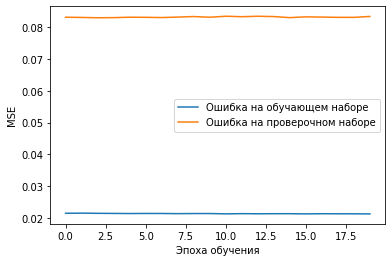

Суммарный процент ошибки на проверочной выборке: 13.0%


In [ ]:
#Отобразим результаты
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Предсказываем проверочную выборку
predict = model_ula.predict(x_my_train[n_val:])
predict = y_train_scaler.inverse_transform(predict).flatten()

# суммарный процент ошибки на проверочной выборке
delta = predict - y_my_train[n_val:]
abs_delta = abs(delta)
mean_delta = np.sum(abs_delta)/len(abs_delta)
mean_price = np.sum(y_my_train[n_val:])/len(y_my_train[n_val:])
print("Суммарный процент ошибки на проверочной выборке: ", round(100*mean_delta / mean_price), "%", sep="")

In [ ]:
#Предсказываем тестовую выборку
predict = model_ula.predict(x_test)
predict = y_test_scaler.inverse_transform(predict).flatten()

# Затем подсчитаем ошибку на каждом примере тестовой выборки и суммарный процент ошибки.

print('{:>10} {:>10} {:>10} {:>10}'.format('predict', 'y', 'error', 'error %'))

sum = 0

for i in range(y_test.shape[0]):
  price = predict[i] 
  real_price = y_test[i] 
  print('{:>10.0f} {:>10.0f} {:>10.0f} {:>10.3f}'.format(price, real_price, abs(price - real_price), ((price / real_price) - 1) * 100))
  sum += abs(((price / real_price) - 1) * 100)

Выходные данные были обрезаны до нескольких последних строк (5000).
    450549     470000      19451     -4.139
    493269     450000      43269      9.615
    264916     259990       4926      1.895
   1050244    1099000      48756     -4.436
    715512     700000      15512      2.216
    517462     550000      32538     -5.916
    466149     420000      46149     10.988
   1216236    1400000     183764    -13.126
    444059     390000      54059     13.861
    198596     225000      26404    -11.735
    408103     420000      11897     -2.833
    197590     200000       2410     -1.205
    425675     415000      10675      2.572
    175175     240000      64825    -27.011
    392799     430000      37201     -8.651
    136395     140000       3605     -2.575
    728090     820000      91910    -11.208
    960785     910000      50785      5.581
   1049500     889900     159600     17.935
    888130     900000      11870     -1.319
    353063     250000     103063     41.225
    1123

In [ ]:
result = sum/y_test.shape[0]  
print('Суммарный процент ошибки на тестовой выборке:', round(result,3), "%")

Суммарный процент ошибки на тестовой выборке: 21.452 %


**Выводы:** Процент ошибки на тестовой выборке довольно высокий, но с другой стороны и не такой плохой, так как база небольшая и не имеет ряда важных параметров сильно влияющих на стоимость. Например состояние машины, которое очень сильно влияет на стоимость в данном наборе не учитывается(его просто нет в базе). А ведь если например машина битая она намного дешевле машины в хорошем состоянии, а из-за того что данного параметра в базе нет, но сеть не может различить машины по этому признаку и битую машину оценить также как и машину в хорошем состоянии так же как и наоборот. Из этого можно сделать вывод, что качество базы и полнота данных очень важный фактор для правильного обучения сети. Даже при идеально подобранной архитектуре - плохая и некачественная база может испортить все дело. GIGO!
Конечно, результат моей работы наверняка можно намного улучшить, но выводов выше это не отменяет;)